# Data Visualization Tool

Requires jupiter to run. 

## Anaconda

Anaconda is a python distribution - includes jupyter and other helpful science packages.

    brew install --cask anaconda

If path is not added. Add this line to ~/.zshrc or similar.

    export PATH="/usr/local/anaconda3/bin:$PATH"

Run source to update.

    source ~/.zshrc

## No Anaconda

Install jupyter

    brew install jupyter

If a normal python distribution exists, install the following packages:

    python -m pip install -U matplotlib
    python -m pip install -U numpy

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates


In [2]:
def getVisualization(filepath, title = 'Frequency by Location', entries = 1000):

    with open(filepath, 'r') as file:
        data = json.load(file)

    # could be optimized to run faster - currently many for loops
    locations = set([d['location'] for d in data])

    for location in locations:
        timestamps = [d['timestamp'] for d in data if d['location'] == location]
        frequencies = [d['frequency'] for d in data if d['location'] == location]

        timestamps = [t[:-1] for t in timestamps]

        timestamps = np.array(timestamps, dtype='datetime64[s]')

        plt.plot(timestamps[:entries], frequencies[:entries], label=location)

    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M:%S'))

    plt.tick_params(axis='x', rotation=90)
    plt.xlabel('Timestamp')
    plt.ylabel('Frequency')

    plt.title(title)
    plt.legend()

    plt.tight_layout()
    png_filepath = filepath[:-5] + '-' + str(entries) + '.png'
    plt.savefig(png_filepath, dpi=300)
    plt.show() 

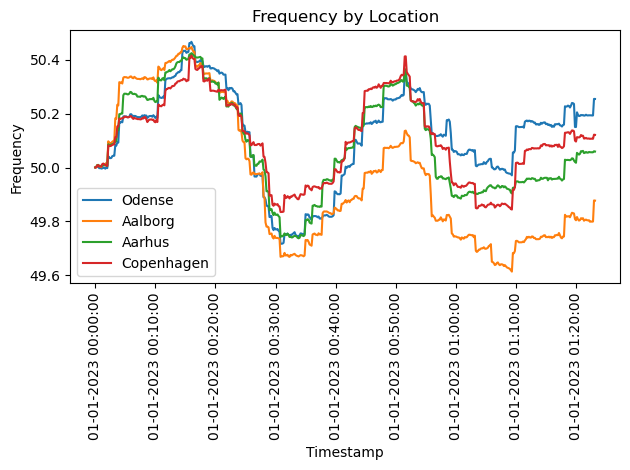

In [38]:
filepath = "./data/pmu-measurements-2023-05-24T16:14.json"
entries = 500
getVisualization(filepath, 'Frequency by Location', entries)

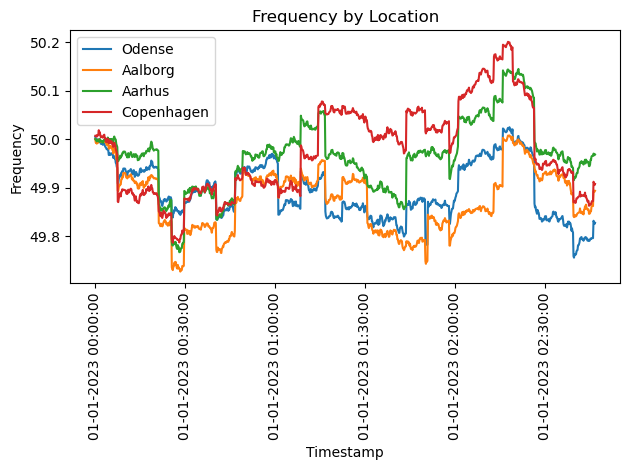

In [19]:
filepath = "./data/pmu-measurements-2023-05-19T10:25.json"
entries = 1000
getVisualization(filepath, 'Frequency by Location', entries)

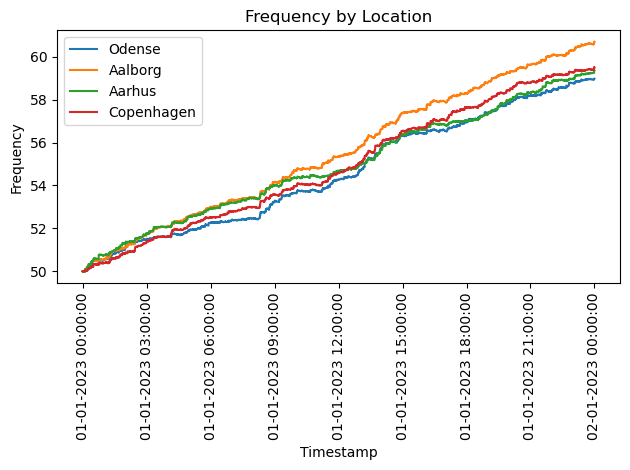

In [13]:
filepath = "./data/pmu-measurements-increasing.json"
entries = 1000000
getVisualization(filepath, 'Frequency by Location', entries)

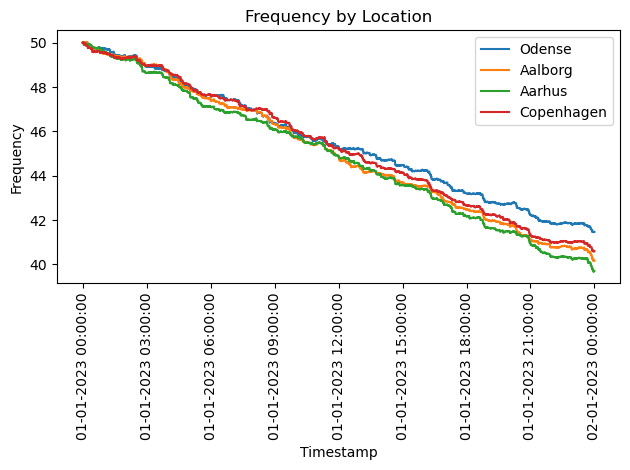

In [14]:
filepath = "./data/pmu-measurements-decreasing.json"
entries = 1000000

getVisualization(filepath, 'Frequency by Location', entries)

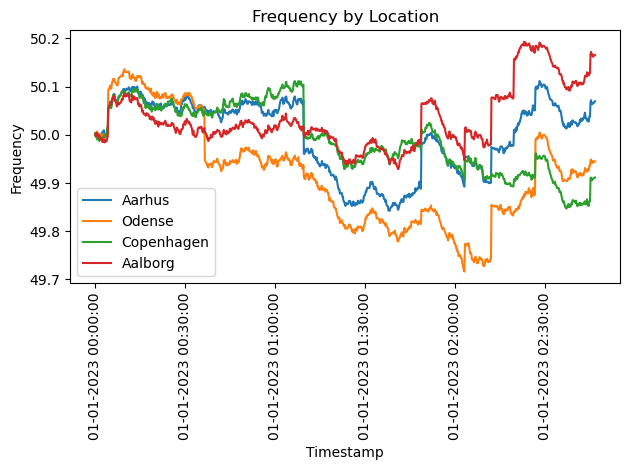

In [90]:
filepath = "./data/pmu-measurements-2023-05-24.json"
entries = 1000000
getVisualization(filepath, 'Frequency by Location', entries)

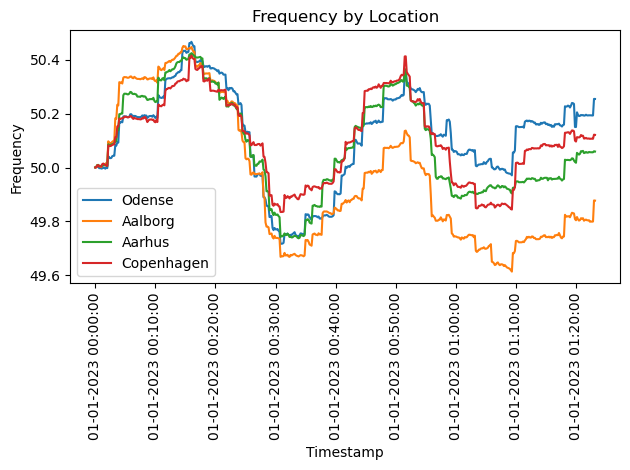

In [40]:
filepath = "./pmu_measurements.json"
entries = 500
getVisualization(filepath, 'Frequency by Location', entries)